<a href="https://colab.research.google.com/github/hans8854/hans8854/blob/main/0517code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 載入並顯示圖片
img = cv2.imread('/content/drive/MyDrive/0424_picture/color_photo_test0.jpg')
depth = cv2.imread('/content/drive/MyDrive/0424_picture/depth_photo_test0.jpg')
Scale = 0.0010000000474974513

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 輸出圖像大小，方便根據圖像大小調節minRadius和maxRadius
print(img.shape)
# 霍夫變換圓檢測
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,
                           100, param1=100, param2=30, minRadius=5, maxRadius=25)
# 輸出返回值，方便查看類型
print(circles)
print(circles[0])
# 輸出檢測到圓的個數
print(len(circles[0]))

print('------------------------------')
new_image = []
# 根據檢測到圓的信息，畫出每一個圓
for circle in circles[0]:
    # 圓的基本信息
    print(circle[2])
    # 座標行列
    x = int(circle[0])
    y = int(circle[1])
    # 半徑
    r = int(circle[2])
    # 在原圖用指定顏色標記出圓的位置
    img = cv2.circle(img, (x, y), r, (0, 0, 255), 2)
    img = cv2.circle(img, (x, y), 2, (255, 255, 0), -1)
    img = cv2.rectangle(img, (x-r, y-r), (x+r, y+r), (0, 255, 255), 2)
    for i in range(-2,3,2):
      for j in range(-2,3,2):
        img = cv2.rectangle(img, (x+i*r-r, y+j*r-r), (x+i*r+r, y+j*r+r), (0, 255, 255), 2)
        depth = cv2.rectangle(depth, (x+i*r-r, y+j*r-r), (x+i*r+r, y+j*r+r), (0, 255, 255), 2)
        new_image.append(img[y+j*r-r:y+j*r+r,x+i*r-r:x+i*r+r])

# 顯示新圖像
cv2_imshow(img)
cv2_imshow(depth)
for i in range(len(new_image)):
  cv2_imshow(new_image[i])


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 載入並顯示圖片
img = cv2.imread('/content/drive/MyDrive/0424_picture/color_photo_test1.jpg')
depth = cv2.imread('/content/drive/MyDrive/0424_picture/depth_photo_test1.png')
Scale = 0.0010000000474974513

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 輸出圖像大小，方便根據圖像大小調節minRadius和maxRadius
print(img.shape)
# 霍夫變換圓檢測
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,
                           100, param1=100, param2=30, minRadius=5, maxRadius=25)
# 輸出返回值，方便查看類型
print(circles)
print(circles[0])
# 輸出檢測到圓的個數
print(len(circles[0]))

print('------------------------------')
new_image = []
new_img = np.copy(img)
img_display = np.copy(img)
# 根據檢測到圓的信息，畫出每一個圓
for circle in circles[0]:
    # 圓的基本信息
    print(circle[2])
    # 座標行列
    x = int(circle[0])
    y = int(circle[1])
    # 半徑
    r = int(circle[2])
    # 在原圖用指定顏色標記出圓的位置
    img_display = cv2.circle(img_display, (x, y), r, (0, 0, 255), 2)
    img_display = cv2.circle(img_display, (x, y), 2, (255, 255, 0), -1)
    img_display = cv2.rectangle(img_display, (x-r, y-r), (x+r, y+r), (0, 255, 255), 2)
    center_mask = np.zeros_like(new_img)
    center_mask[y-r:y+r,x-r:x+r] = new_img[y-r:y+r,x-r:x+r]
    
    new_img[y-r:y+r,x-r:x+r] = 0    
    pts = np.array([[[x, y], [x-3*r, y-3*r], [x, y-3*r]],
              [[x, y], [x, y-3*r], [x+3*r, y-3*r]],
              [[x, y], [x+3*r, y-3*r], [x+3*r, y]],
              [[x, y], [x+3*r, y], [x+3*r, y+3*r]],
              [[x, y], [x+3*r, y+3*r], [x, y+3*r]],
              [[x, y], [x, y+3*r], [x-3*r, y+3*r]],
              [[x, y], [x-3*r, y+3*r], [x-3*r, y]],
              [[x, y], [x-3*r, y], [x-3*r, y-3*r]]], np.int32)
    for i in range(8):
        img_display = cv2.polylines(img_display, [pts[i]], True, (0, 255, 255), thickness=2)
        depth = cv2.polylines(depth, [pts[i]], True, (0, 255, 255), thickness=2)
        mask = np.zeros_like(new_img)
        # 將三點連接起來形成三角形
        cv2.drawContours(mask, [pts[i]], 0, (255, 255, 255), -1)
        # 將圖像與掩碼圖像進行位元運算，提取三角形區域
        result = cv2.bitwise_and(new_img, mask)
        new_image.append(result)

# 顯示新圖像
cv2_imshow(img)
cv2_imshow(img_display)
cv2_imshow(depth)
cv2_imshow(new_img)
# for i in range(len(new_image)):
#   cv2_imshow(new_image[i])


In [18]:
myArr = np.loadtxt('/content/drive/MyDrive/0424_picture/depth_info1.csv', delimiter=',')

In [19]:
print(myArr)


[[447. 447. 447. ... 446. 446. 446.]
 [447. 447. 447. ... 446. 446. 446.]
 [447. 447. 447. ... 446. 446. 446.]
 ...
 [441. 441. 441. ... 440. 440. 440.]
 [441. 441. 441. ... 440. 440. 440.]
 [441. 441. 441. ... 440. 440. 440.]]


In [20]:
print(myArr.shape)

(200, 200)


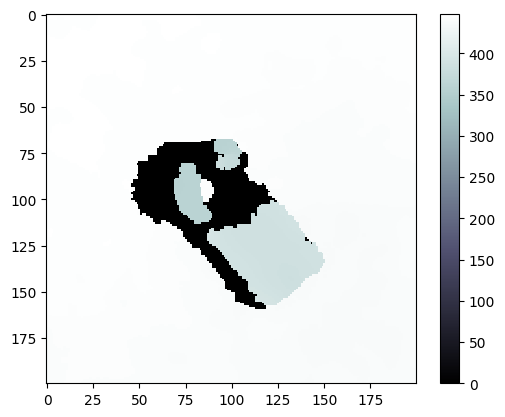

In [21]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# myArr = myArr*0.0010000000474974513


plt.imshow(myArr, cmap='bone', interpolation='nearest')
plt.colorbar()
plt.show()

numpy

In [22]:
depth_vale = []
for i in range(len(new_image)):
  # cv2_imshow(new_image[i])
  gray_img = cv2.cvtColor(new_image[i], cv2.COLOR_BGR2GRAY)
  depth_list = []
  for i in range(200):
    for j in range(200):
      if gray_img[i,j] != 0:
          if myArr[i,j] != 0:
            depth_list.append(myArr[i,j])
  depth_list = np.array(depth_list).astype(int)
  depth_vale.append(depth_list) 
depth_vale = np.array(depth_vale)


<ipython-input-22-aea482787b19>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  depth_vale = np.array(depth_vale)


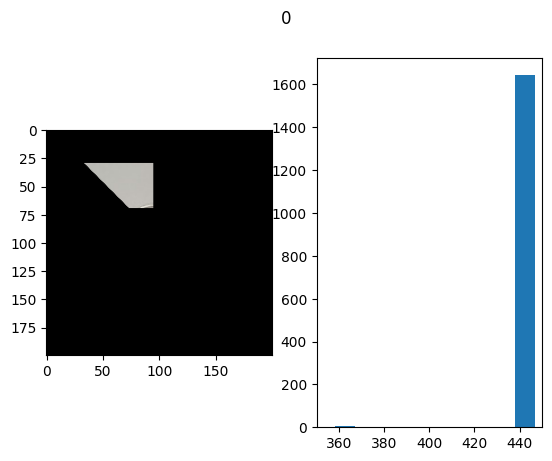

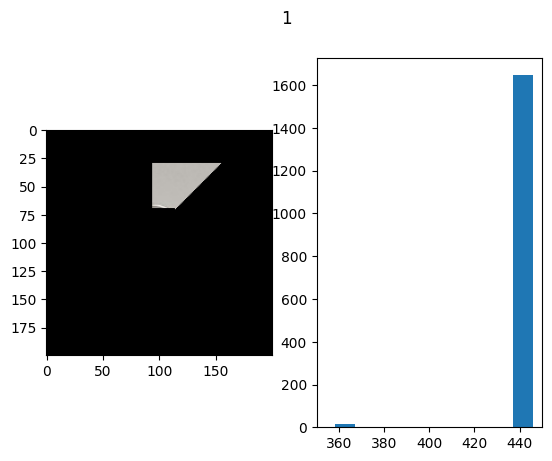

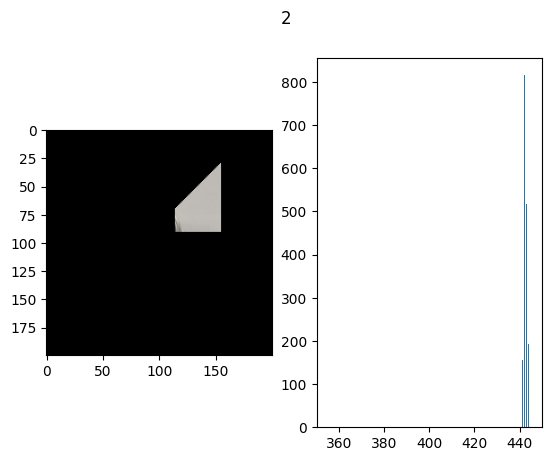

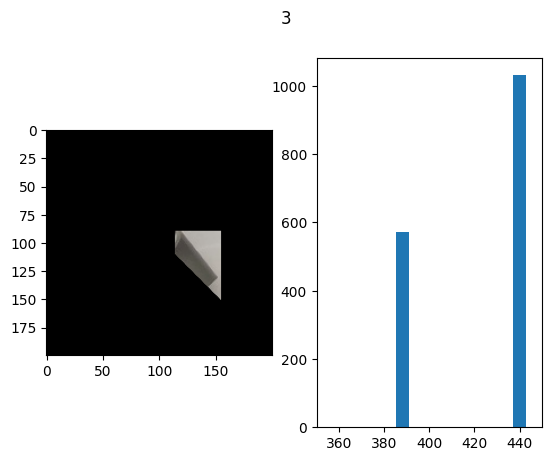

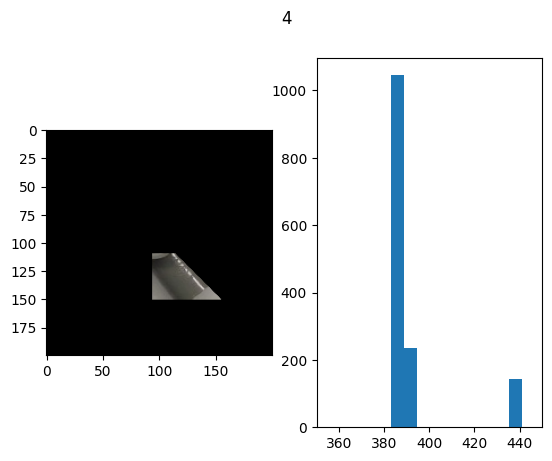

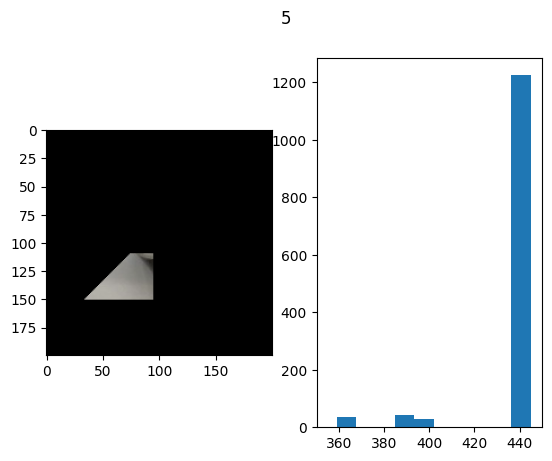

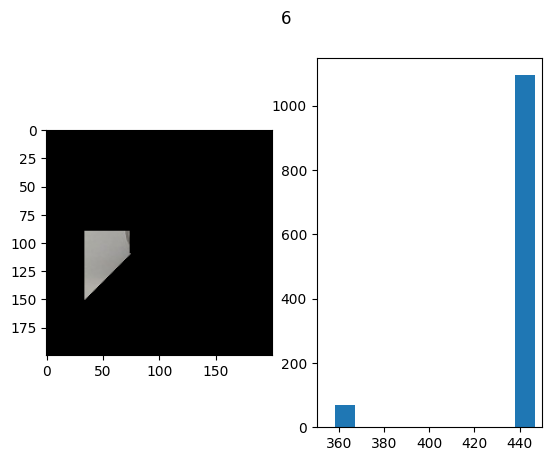

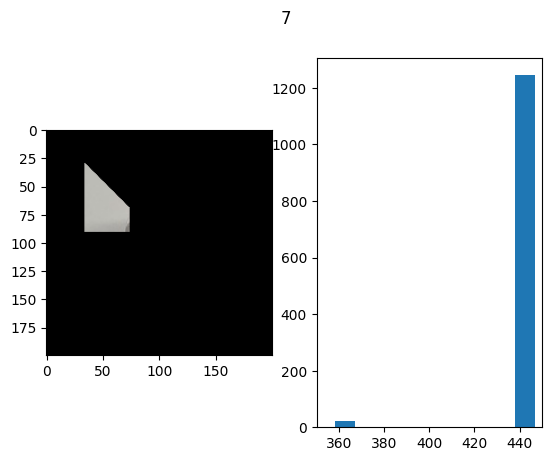

In [23]:
%matplotlib inline
for i in range(8):
  # 绘制第一个子图
  title = str(i)
  plt.suptitle(title)
  plt.subplot(1, 2, 1)
  plt.imshow(new_image[i], cmap='gray')

  # 绘制第二个子图
  plt.subplot(1, 2, 2)
  plt.hist(depth_vale[i])
  plt.xlim(350,450)
  plt.show()
  

list＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

In [9]:
from collections import Counter
depth_vale = []
for i in range(len(new_image)):
  # cv2_imshow(new_image[i])
  gray_img = cv2.cvtColor(new_image[i], cv2.COLOR_BGR2GRAY)
  depth_list = []
  for i in range(200):
    for j in range(200):
      if gray_img[i,j] != 0:
          depth_list.append(myArr[i,j].astype(int))
  depth_vale.append(depth_list)
type(depth_vale)

list

In [13]:
for i in depth_vale:
  # print(i)
  counter = Counter(i)
  print(counter)

Counter({445: 948, 446: 556, 447: 135, 0: 10, 358: 7, 444: 4})
Counter({444: 881, 445: 594, 443: 133, 446: 38, 358: 12, 359: 3})
Counter({442: 815, 443: 517, 444: 192, 441: 156, 445: 1})
Counter({440: 389, 441: 293, 442: 166, 386: 166, 387: 153, 439: 138, 388: 133, 389: 82, 0: 77, 443: 38, 390: 24, 385: 15, 438: 7})
Counter({385: 467, 0: 256, 386: 235, 384: 136, 390: 120, 387: 109, 389: 92, 388: 91, 440: 72, 439: 70, 391: 24, 383: 7, 441: 2})
Counter({0: 351, 443: 333, 444: 319, 442: 239, 445: 132, 441: 99, 440: 79, 359: 36, 439: 23, 395: 12, 392: 11, 391: 10, 394: 9, 393: 9, 390: 9, 396: 7, 389: 3})
Counter({445: 543, 0: 499, 446: 367, 444: 134, 359: 45, 447: 32, 358: 23, 443: 18})
Counter({446: 633, 445: 594, 0: 394, 359: 18, 447: 13, 444: 4, 358: 4})


＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

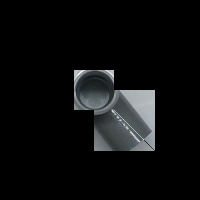

In [11]:
result = center_mask + new_image[3]+ new_image[4]
cv2_imshow(result)

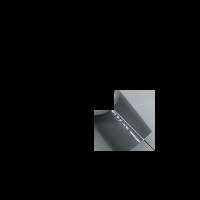

In [12]:
cul_img = new_image[3]+ new_image[4]
cv2_imshow(cul_img)

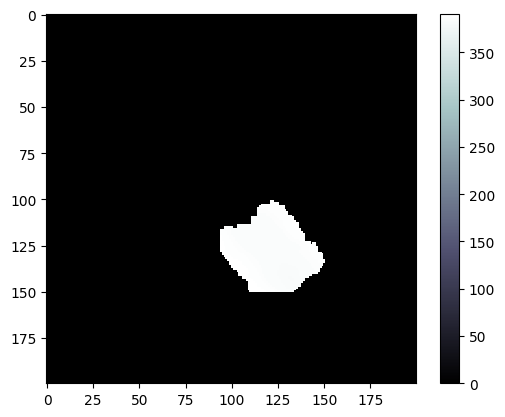

(200, 200)

In [14]:
depth_3d = np.zeros((200,200))


gray_cul_img = cv2.cvtColor(cul_img, cv2.COLOR_BGR2GRAY)
for i in range(200):
  for j in range(200):
    if gray_cul_img[i,j] != 0:
      if myArr[i,j] < 400:
        # print(myArr[i,j])
        depth_3d[i,j] = myArr[i,j]

plt.imshow(depth_3d, cmap='bone', interpolation='nearest')
plt.colorbar()
plt.show()


depth_3d.shape

In [15]:
# 統計
depth_3d = depth_3d.flatten()
depth_3d.tolist()
counter_depth_3d = Counter(depth_3d)
print(counter_depth_3d)



Counter({0.0: 38177, 385.0: 471, 386.0: 381, 387.0: 262, 388.0: 224, 389.0: 174, 390.0: 144, 384.0: 136, 391.0: 24, 383.0: 7})


In [16]:
depth_3d[depth_3d > 0] = 1

In [17]:
depth_3d.shape
# (200, 200)

(200, 200)

In [18]:
depth_3d = cv2.circle(depth_3d, (x, y), r, 1, -1)

In [19]:
depth_3d = depth_3d.astype(int).astype('uint8')

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
closed = cv2.morphologyEx(depth_3d, cv2.MORPH_CLOSE, kernel)


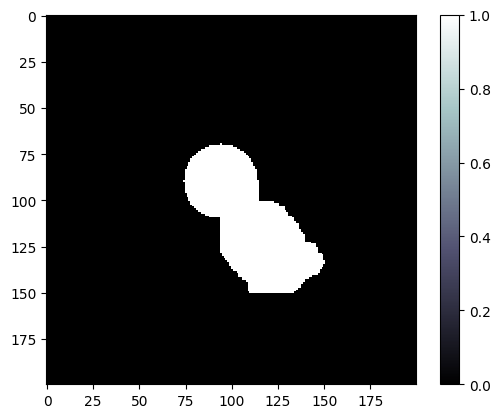

In [21]:
plt.imshow(closed, cmap='bone', interpolation='nearest')
plt.colorbar()
plt.show()

In [22]:
cnt, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ellipse = cv2.fitEllipse(cnt[0])
# # 绘制椭圆
img_ellipse = np.copy(img)
img_ellipse = cv2.ellipse(img_ellipse,ellipse,(0,0,255),2)

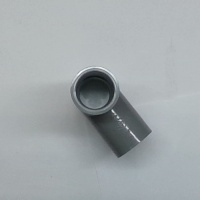

In [23]:
cv2_imshow(img)

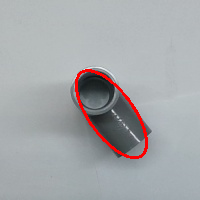

In [24]:
cv2_imshow(img_ellipse)

In [25]:

ellipse_xy = np.around(np.array(ellipse[0])).astype(int)
ellipse_ab = np.around(np.array(ellipse[1])).astype(int)
ellipse_angle = np.around(np.array(ellipse[2])).astype(int)
ellipse_angle

144

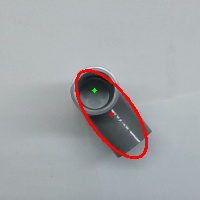

In [26]:
img_ellipse = cv2.circle(img_ellipse, ellipse_xy, 2, (0, 0, 255), -1)
img_ellipse = cv2.circle(img_ellipse, (x,y), 2, (0, 255, 0), -1)
cv2_imshow(img_ellipse)

54


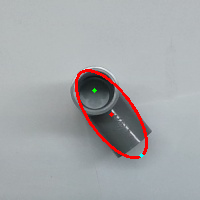

In [27]:
# draw major axis line in red
import math
rmajor = max(ellipse_ab)/2
if ellipse_angle > 90:
    angle = ellipse_angle - 90
else:
    angle = ellipse_angle + 90
print(angle)

x_point = ellipse_xy[0] + math.cos(math.radians(angle))*rmajor
y_point = ellipse_xy[1] + math.sin(math.radians(angle))*rmajor
img_ellipse = cv2.circle(img_ellipse, (int(x_point),int(y_point)), 2, (255, 255, 0), -1)
cv2_imshow(img_ellipse)

In [28]:
print("方程式:")
k = (ellipse_xy[1] - y_point) / (ellipse_xy[0] - x_point)
b = y_point - k * x_point
print("\ty = %.2f*x + %.2f" % (k, b))

方程式:
	y = 1.38*x + -38.78


In [29]:
print(int(199-b/k),199)

227 199


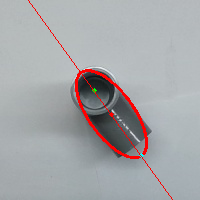

In [30]:
img_ellipse = cv2.line(img_ellipse, (int(-b/k),0), (int((199-b)/k),199), (0,0,255), 1)
cv2_imshow(img_ellipse)

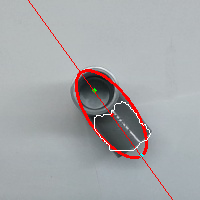

In [31]:

contours, hierarchy = cv2.findContours(depth_3d, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_ellipse, contours, 0, (255, 255, 255), 1)
cv2_imshow(img_ellipse)

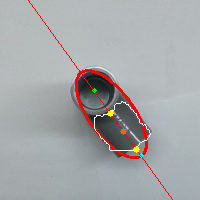

In [32]:
a = 0
point_list = []
for i in contours[0]:
  point_list.append(np.abs(i[0,0]-(i[0,1]*k + b)))
point_list = np.array(point_list)
point_list_argsort = np.argsort(point_list)
cross_pts1 = (contours[0][point_list_argsort[0],0])
cross_pts2 = (contours[0][point_list_argsort[1],0])
img_ellipse = cv2.circle(img_ellipse, (cross_pts1[1],cross_pts1[0]), 3, (0, 255, 255), -1)
img_ellipse = cv2.circle(img_ellipse, (cross_pts2[1],cross_pts2[0]), 3, (0, 255, 255), -1)
center_point = (int((cross_pts1[1]+cross_pts2[1])/2),int((cross_pts1[0]+cross_pts2[0])/2))
img_ellipse = cv2.circle(img_ellipse, center_point, 3, (0, 97, 255), -1)

cv2_imshow(img_ellipse)

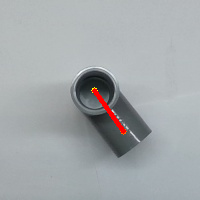

In [33]:
img_center_line = np.copy(img)
img_center_line = cv2.circle(img_center_line, center_point, 3, (0, 97, 255), -1)
img_center_line = cv2.circle(img_center_line, (x,y), 3, (0, 255, 255), -1)
img_center_line = cv2.line(img_center_line, center_point, (x,y), (0,0,255), 3)

cv2_imshow(img_center_line)

In [ ]:

import numpy as np

arr = np.array([0, 0, 0, 0, 0, 0])

nonzero_indices = np.nonzero(arr)[0]  # 找到非零元素的索引
# min_nonzero_index = nonzero_indices[np.argmin(arr[nonzero_indices])]  # 在非零元素的索引中找到最小值的位置

print(len(nonzero_indices))  # 输出最小非零元素的索引

0


In [ ]:
x_pts = []
y_pts = []
z_pts = []
gray_cul_img = cv2.cvtColor(cul_img, cv2.COLOR_BGR2GRAY)
for i in range(0,200,5):
  for j in range(0,200,5):
    if gray_cul_img[i,j] != 0:
      if myArr [i,j] != 0 and myArr[i,j] < 400:
        y_pts.append(i)
        x_pts.append(j)
        z_pts.append(myArr[i,j])
x_pts = np.array(x_pts)
y_pts = np.array(y_pts)
z_pts = np.array(z_pts)
print(x_pts)
print(y_pts)
print(z_pts)


[115 120 125 115 120 125 130 100 105 110 115 120 125 130 135  95 100 105
 110 115 120 125 130 135  95 100 105 110 115 120 125 130 135 140 145  95
 100 105 110 115 120 125 130 135 140 145 100 105 110 115 120 125 130 135
 140 145 105 110 115 120 125 130 135 140 145 110 115 120 125 130 135 110
 115 120 125 130]
[105 105 105 110 110 110 110 115 115 115 115 115 115 115 115 120 120 120
 120 120 120 120 120 120 125 125 125 125 125 125 125 125 125 125 125 130
 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135
 135 135 140 140 140 140 140 140 140 140 140 145 145 145 145 145 145 150
 150 150 150 150]
[387. 388. 389. 386. 386. 388. 389. 386. 385. 385. 385. 386. 386. 388.
 390. 389. 387. 385. 385. 385. 385. 385. 387. 388. 390. 388. 386. 386.
 385. 385. 385. 386. 386. 387. 389. 390. 389. 388. 387. 386. 385. 385.
 385. 386. 387. 388. 391. 390. 388. 386. 385. 385. 384. 385. 386. 387.
 390. 389. 387. 386. 384. 384. 384. 385. 386. 390. 388. 386. 385. 384.
 384. 391. 391. 389. 387.

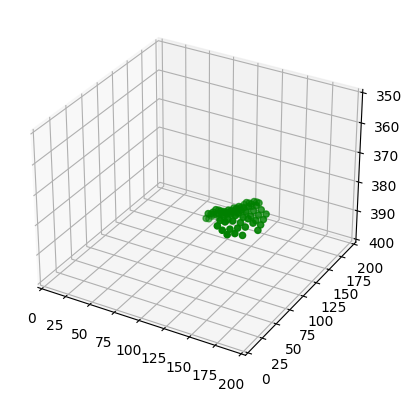

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# 設定ax為散佈圖
ax.set_xlim(0,200)
ax.set_ylim(0,200)
ax.set_zlim(350,400) 
ax.scatter(x_pts, y_pts, z_pts, c ='g')
ax.invert_zaxis()
plt.show()
